# LRTC-TNN algorithm to do the gap filling of multiple time series

#### Reference: https://www.sciencedirect.com/science/article/pii/S0968090X2030588X#!  
Chen et al. (2020) A nonconvex low-rank tensor completion model for spatiotemporal traffic data imputation
#### GitHub: https://github.com/xinychen/transdim


The missing value ratio of original 10 year measurements for 3 buoys:  
　　- Buoy1 Penzance     1.67%  
　　- Buoy2 Looe        1.66%  
　　- Buoy3 Perranporth   2.05%  
#### Conclusions: 
1) Achieve the missing data imputation for 3 buoys measurements in 10 years for time series predition ==> 'Imputed_Measurement'  
2) By comparing the imputation series with the non-zero series, most variables achieve higher than <font color='red'>**95%**</font> accuracy.  
3) Dirp transfer to sin & cos cannot improve the gap filling accuracy, thus it's not worth doing.  
4) By decomposing the imputated measurement, the semidiurnal type feature of wave parameters can be seen which support the validity of the method.  
5) This method can be extended to more parameters/more measurements gap filling.  



------------------------------------------------------------------------------------
**Further Research and Relevant reference:**  
low-rank representation can effectively characterize the complex spatial and temporal dependencies rooted in the data. However, a fundamental limitation of these factorization-based models lies in their inefficiency in dealing with streaming data: the model has to be fully retrained whenever new data arrives to the system. 【Ren et al. (2021). Incremental Bayesian matrix/tensor learning for structural monitoring data imputation and response forecasting】  

==> This paper affirmed the validity of the low-rank representation algorithm. In current model, we deal with original dataset instead of streaming data, but for further research, if our model is targeted to streaming data, we can use the above mentioned Bayesian temporal factorization model.

In [37]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import sys
import datetime
sys.setrecursionlimit(1000000)

In [38]:
import pickle
def save(fname, data, protocol=3):
    with open(fname, "wb") as f:
        pickle.dump(data, f, protocol)

def load(fname):
    with open(fname, "rb") as f:
        return pickle.load(f)

# Generate combined table and fill gap with 0
## Assume no 0 would exist in any variables

In [333]:
# Choose integer number of timeseries '2010-01-02 00:00:00' - '2019-12-30 23:30:00', 175200 rows

Penzance_buoy = load('../Penzance_20112019').resample('0.5H').mean().iloc[47:-47,2:] # 0.02083333334D
Looe_buoy = load('../Looe_20112019').resample('0.5H').mean().iloc[20:-47,2:]
Perranporth_buoy = load('../Perranporth_20112019').resample('0.5H').mean().iloc[47:-47,2:]
Porthleven_buoy = load('../Porthleven_20112019').resample('0.5H').mean().iloc[20:-47,2:]

In [334]:
# Penzance_buoy[(Penzance_buoy['Peak Direction (degrees)']==0)&(Penzance_buoy['Sea Temp (C)']!=0)]
# &(Looe_buoy['Spread (degrees)']==0)
# Looe_buoy[(Looe_buoy['Peak Direction (degrees)']==0)].index.shape
# Looe_buoy[(Looe_buoy['Spread (degrees)']==0)]
Perranporth_buoy[(Perranporth_buoy['Spread (degrees)']==0)] #(Perranporth_buoy['Peak Direction (degrees)']==0) & 

,Wave Height (m),Max Wave Height (m),Tpeak (s),Tz (s),Peak Direction (degrees),Spread (degrees),Sea Temp (C)
Time (GMT),,,,,,,
2010-01-31 23:30:00,1.18,1.98,5.9,4.2,0.0,0.0,0.0
2010-02-01 00:00:00,1.18,1.91,6.1,4.4,0.0,0.0,0.0
2010-02-28 23:30:00,1.26,1.74,6.1,4.8,0.0,0.0,0.0
2010-03-01 00:00:00,1.28,1.90,5.6,4.8,0.0,0.0,0.0
2010-03-31 23:30:00,2.09,3.00,7.1,5.2,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2014-12-01 00:00:00,1.11,1.67,11.1,5.4,0.0,0.0,0.0
2015-02-01 00:00:00,3.99,7.27,9.5,6.5,0.0,0.0,0.0
2015-03-01 00:00:00,2.83,5.03,8.7,5.6,0.0,0.0,0.0


## Transfer Dirp to sin & cos
### Idea: 1) Turn all 0 to NaN; 2) Transfer degree to sin&cos; 3) Turn NaN to 0

In [331]:
Penzance_buoy.iloc[:,4:] = Penzance_buoy.iloc[:,4:].replace(0,np.nan)
Looe_buoy.iloc[:,4:] = Looe_buoy.iloc[:,4:].replace(0, np.nan)
Perranporth_buoy.iloc[:,4:] = Perranporth_buoy.iloc[:,4:].replace(0, np.nan)
Perranporth_buoy.iloc[:,4:] = Perranporth_buoy.iloc[:,4:].replace(0,np.nan)

In [332]:
Perranporth_buoy[(Perranporth_buoy['Peak Direction (degrees)']==0) & (Perranporth_buoy['Spread (degrees)']==0)]

,Wave Height (m),Max Wave Height (m),Tpeak (s),Tz (s),Peak Direction (degrees),Spread (degrees),Sea Temp (C)
Time (GMT),,,,,,,


In [42]:
# Penzance_buoy
# Looe_buoy
# Perranporth_buoy

In [552]:
combine_dense = pd.concat([Penzance_buoy, Looe_buoy, Perranporth_buoy], join='outer',axis=1)

In [367]:
# combine_dense.columns = ['1Wave Height (m)', '1Max Wave Height (m)', '1Tpeak (s)', '1Tz (s)',
#        '1Peak Direction (degrees)', '1Spread (degrees)', '1Sea Temp (C)',
#        '2Wave Height (m)', '2Max Wave Height (m)', '2Tpeak (s)', '2Tz (s)',
#        '2Peak Direction (degrees)', '2Spread (degrees)', '2Sea Temp (C)',
#        '3Wave Height (m)', '3Max Wave Height (m)', '3Tpeak (s)', '3Tz (s)',
#        '3Peak Direction (degrees)', '3Spread (degrees)', '3Sea Temp (C)']
# combine_dense

,1Wave Height (m),1Max Wave Height (m),1Tpeak (s),1Tz (s),1Peak Direction (degrees),1Spread (degrees),1Sea Temp (C),2Wave Height (m),2Max Wave Height (m),2Tpeak (s),...,2Peak Direction (degrees),2Spread (degrees),2Sea Temp (C),3Wave Height (m),3Max Wave Height (m),3Tpeak (s),3Tz (s),3Peak Direction (degrees),3Spread (degrees),3Sea Temp (C)
Time (GMT),,,,,,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,0.41,0.53,10.5,6.8,188.0,16.0,8.1,0.58,0.77,13.3,...,201.0,15.0,9.0,0.52,0.94,10.5,4.0,283.0,27.0,9.0
2010-01-02 00:30:00,0.37,0.59,11.1,6.3,187.0,10.0,8.2,0.52,0.79,11.1,...,208.0,19.0,9.1,0.54,0.79,4.8,4.1,316.0,42.0,9.1
2010-01-02 01:00:00,0.38,0.55,12.5,6.8,184.0,9.0,8.1,0.52,0.84,11.1,...,215.0,19.0,9.0,0.53,0.74,10.0,4.2,280.0,31.0,9.0
2010-01-02 01:30:00,0.38,0.59,11.8,7.0,184.0,12.0,8.2,0.51,0.81,12.5,...,203.0,14.0,9.0,0.56,0.80,4.4,4.1,326.0,49.0,9.0
2010-01-02 02:00:00,0.39,0.51,11.1,7.3,190.0,11.0,8.3,0.48,0.63,10.5,...,212.0,15.0,9.0,0.57,0.89,10.0,4.2,290.0,22.0,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 21:30:00,0.72,1.23,5.0,4.3,184.0,19.0,10.5,0.89,1.08,10.0,...,205.0,14.0,10.9,1.27,1.96,11.8,6.6,290.0,28.0,10.6
2019-12-30 22:00:00,0.71,1.03,5.3,4.3,186.0,23.0,10.5,0.85,1.40,11.1,...,211.0,17.0,10.9,1.30,1.98,11.1,6.8,274.0,34.0,10.6
2019-12-30 22:30:00,0.71,0.92,5.6,4.2,181.0,19.0,10.5,0.81,1.19,11.8,...,210.0,13.0,10.9,1.16,1.76,11.8,6.5,277.0,40.0,10.6


Degree transfer

In [240]:
# Get degree from sin & cos function
def return_degree(sin_x, cos_x): 
    if (sin_x >= 0) & (cos_x > 0):
        return np.arcsin(sin_x)*180/np.pi
    if (sin_x > 0) & (cos_x <= 0):
        return np.arccos(cos_x)*180/np.pi
    else:
        return 360-np.arccos(cos_x)*180/np.pi
    
# Example
degree_test = 354 # Any degree transfer to within [0, 360]
a,b = np.sin(degree_test*np.pi/180), np.cos(degree_test*np.pi/180)
return_degree(a,b)

354.0

In [269]:
from interval import Interval
0 in Interval(-1,1)

True

In [311]:
# Get degree from sin & cos function
from interval import Interval
def return_degree(sin_x, cos_x): 
    if (1 >= sin_x >= 0) & (1 >= cos_x > 0):
        return np.arcsin(sin_x)*180/np.pi
    if (1 >= sin_x > 0) & (-1<= cos_x <= 0):
        return np.arccos(cos_x)*180/np.pi
    elif ((cos_x in Interval(-1,1)) & (sin_x in Interval(-1,1)))==True:
        return 360-np.arccos(cos_x)*180/np.pi
    elif (sin_x in Interval(-1,1))==True:
        return 360+np.arcsin(sin_x)*180/np.pi
    elif (cos_x in Interval(-1,1))==True:
        return 360-np.arccos(cos_x)*180/np.pi
    else:
        return 0
    
# Example
degree_test = 270 # Any degree transfer to within [0, 360]
a,b = np.sin(degree_test*np.pi/180), np.cos(degree_test*np.pi/180)
return_degree(a,b)

270.0

In [285]:
return_degree(-1, 1)

360.0

In [279]:
((b in Interval(-1,1)) | (a in Interval(-1,1)))==False

False

In [213]:
360+np.arcsin(np.sin(300*np.pi/180))*180/np.pi

300.0

In [222]:
# Transfer degree to sin & cos
for i in range(1,4):
    locals()['Dirp'+str(i)+'_sin'] = np.array(np.sin(combine_dense[str(i)+'Peak Direction (degrees)']*np.pi/180))
    locals()['Dirp'+str(i)+'_sin'][(locals()['Dirp'+str(i)+'_sin']<1e-10) & (locals()['Dirp'+str(i)+'_sin']>0)]=0 # Turn small number to 0
    locals()['Dirp'+str(i)+'_cos'] = np.array(np.cos(combine_dense[str(i)+'Peak Direction (degrees)']*np.pi/180))
    locals()['Dirp'+str(i)+'_cos'][(locals()['Dirp'+str(i)+'_cos']<1e-10) & (locals()['Dirp'+str(i)+'_cos']>0)]=0
for i in range(1,4):
    combine_dense['Dirp'+str(i)+'_sin'] = locals()['Dirp'+str(i)+'_sin']
    combine_dense['Dirp'+str(i)+'_cos'] = locals()['Dirp'+str(i)+'_cos']

In [368]:
combine_dense

,1Wave Height (m),1Max Wave Height (m),1Tpeak (s),1Tz (s),1Peak Direction (degrees),1Spread (degrees),1Sea Temp (C),2Wave Height (m),2Max Wave Height (m),2Tpeak (s),...,2Peak Direction (degrees),2Spread (degrees),2Sea Temp (C),3Wave Height (m),3Max Wave Height (m),3Tpeak (s),3Tz (s),3Peak Direction (degrees),3Spread (degrees),3Sea Temp (C)
Time (GMT),,,,,,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,0.41,0.53,10.5,6.8,188.0,16.0,8.1,0.58,0.77,13.3,...,201.0,15.0,9.0,0.52,0.94,10.5,4.0,283.0,27.0,9.0
2010-01-02 00:30:00,0.37,0.59,11.1,6.3,187.0,10.0,8.2,0.52,0.79,11.1,...,208.0,19.0,9.1,0.54,0.79,4.8,4.1,316.0,42.0,9.1
2010-01-02 01:00:00,0.38,0.55,12.5,6.8,184.0,9.0,8.1,0.52,0.84,11.1,...,215.0,19.0,9.0,0.53,0.74,10.0,4.2,280.0,31.0,9.0
2010-01-02 01:30:00,0.38,0.59,11.8,7.0,184.0,12.0,8.2,0.51,0.81,12.5,...,203.0,14.0,9.0,0.56,0.80,4.4,4.1,326.0,49.0,9.0
2010-01-02 02:00:00,0.39,0.51,11.1,7.3,190.0,11.0,8.3,0.48,0.63,10.5,...,212.0,15.0,9.0,0.57,0.89,10.0,4.2,290.0,22.0,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 21:30:00,0.72,1.23,5.0,4.3,184.0,19.0,10.5,0.89,1.08,10.0,...,205.0,14.0,10.9,1.27,1.96,11.8,6.6,290.0,28.0,10.6
2019-12-30 22:00:00,0.71,1.03,5.3,4.3,186.0,23.0,10.5,0.85,1.40,11.1,...,211.0,17.0,10.9,1.30,1.98,11.1,6.8,274.0,34.0,10.6
2019-12-30 22:30:00,0.71,0.92,5.6,4.2,181.0,19.0,10.5,0.81,1.19,11.8,...,210.0,13.0,10.9,1.16,1.76,11.8,6.5,277.0,40.0,10.6


In [64]:
combine_dense[combine_dense.index=='2012-07-27 14:00:00']
combine_dense[combine_dense.index=='2010-06-14 03:00:00']

,1Wave Height (m),1Max Wave Height (m),1Tpeak (s),1Tz (s),1Peak Direction (degrees),1Spread (degrees),1Sea Temp (C),2Wave Height (m),2Max Wave Height (m),2Tpeak (s),...,3Tz (s),3Peak Direction (degrees),3Spread (degrees),3Sea Temp (C),Dirp1_sin,Dirp1_cos,Dirp2_sin,Dirp2_cos,Dirp3_sin,Dirp3_cos
Time (GMT),,,,,,,,,,,,,,,,,,,,,
2010-06-14 03:00:00,0.21,0.4,1.8,2.6,0.0,22.0,12.5,0.31,0.48,1.8,...,5.0,284.0,24.0,13.2,0.0,1.0,-0.224951,0.97437,-0.970296,0.241922


In [369]:
combine_dense[combine_dense.isna().T.any().T]

,1Wave Height (m),1Max Wave Height (m),1Tpeak (s),1Tz (s),1Peak Direction (degrees),1Spread (degrees),1Sea Temp (C),2Wave Height (m),2Max Wave Height (m),2Tpeak (s),...,2Peak Direction (degrees),2Spread (degrees),2Sea Temp (C),3Wave Height (m),3Max Wave Height (m),3Tpeak (s),3Tz (s),3Peak Direction (degrees),3Spread (degrees),3Sea Temp (C)
Time (GMT),,,,,,,,,,,,,,,,,,,,,
2010-01-05 15:30:00,0.26,0.35,10.5,5.3,186.0,18.0,8.4,NaN,NaN,NaN,...,NaN,NaN,NaN,1.44,2.77,6.3,4.3,318.0,28.0,8.6
2010-01-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.89,4.74,7.7,...,183.0,35.0,8.4,1.98,3.29,13.3,6.9,278.0,16.0,7.6
2010-01-20 16:00:00,0.85,1.55,7.7,6.1,198.0,14.0,8.8,NaN,NaN,NaN,...,NaN,NaN,NaN,1.71,2.81,12.5,6.3,281.0,22.0,8.1
2010-01-20 16:30:00,0.86,1.34,8.3,5.9,194.0,11.0,8.8,NaN,NaN,NaN,...,NaN,NaN,NaN,2.09,3.12,12.5,7.0,283.0,21.0,8.1
2010-01-20 17:00:00,0.87,1.30,7.1,5.7,194.0,12.0,8.8,NaN,NaN,NaN,...,NaN,NaN,NaN,2.17,3.08,11.8,7.0,273.0,22.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24 17:30:00,1.12,2.10,9.1,4.4,197.0,22.0,10.9,1.99,3.43,8.3,...,217.0,14.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24 23:30:00,0.98,1.82,15.4,6.7,186.0,15.0,10.8,NaN,NaN,NaN,...,NaN,NaN,NaN,3.63,5.12,16.7,7.8,290.0,15.0,10.5
2019-12-27 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.16,1.58,10.5,...,212.0,13.0,11.0,1.64,2.83,11.1,6.7,249.0,45.0,10.6


In [553]:
# combine_dense_0 = combine_dense.dropna(axis=0)
combine_dense_1 = combine_dense.fillna(0)

In [371]:
np.where(np.array(combine_dense_1)==0)

(array([   175,    175,    175, ..., 175050, 175050, 175050], dtype=int64),
 array([ 7,  8,  9, ..., 11, 12, 13], dtype=int64))

## LRTC-TNN

In [372]:
import numpy as np
from numpy.linalg import inv as inv

In [373]:
# Define the operators of tensor unfolding (ten2mat) and matrix folding (mat2ten) using Numpy:
def ten2mat(tensor, mode):
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1), order = 'F')

In [374]:
def mat2ten(mat, tensor_size, mode):
    index = list()
    index.append(mode)
    for i in range(tensor_size.shape[0]):
        if i != mode:
            index.append(i)
    return np.moveaxis(np.reshape(mat, list(tensor_size[index]), order = 'F'), 0, mode)

In [375]:
def svt_tnn(mat, tau, theta):
    [m, n] = mat.shape
    if 2 * m < n:
        u, s, v = np.linalg.svd(mat @ mat.T, full_matrices = 0)
        s = np.sqrt(s)
        idx = np.sum(s > tau)
        mid = np.zeros(idx)
        mid[:theta] = 1
        mid[theta:idx] = (s[theta:idx] - tau) / s[theta:idx]
        return (u[:,:idx] @ np.diag(mid)) @ (u[:,:idx].T @ mat)
    elif m > 2 * n:
        return svt_tnn(mat.T, tau, theta).T
    u, s, v = np.linalg.svd(mat, full_matrices = 0)
    idx = np.sum(s > tau)
    vec = s[:idx].copy()
    vec[theta:] = s[theta:] - tau
    return u[:,:idx] @ np.diag(vec) @ v[:idx,:]

In [376]:
from sklearn.metrics import r2_score

def compute_rmse(var, var_hat):
    return np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_r2(var,var_hat):
    return r2_score(var, var_hat,multioutput='raw_values')

In [377]:
# Ensure the NaN value in training dataset are less than 5%
def LRTC(dense_tensor, sparse_tensor, alpha, rho, theta, epsilon, maxiter):
    """Low-Rank Tenor Completion with Truncated Nuclear Norm, LRTC-TNN."""
    
    dim = np.array(sparse_tensor.shape)
    pos_missing = np.where(sparse_tensor == 0)
    pos_test = np.where((dense_tensor != 0) & (sparse_tensor == 0))
    dense_test = dense_tensor[pos_test]
    del dense_tensor
    
    X = np.zeros(np.insert(dim, 0, len(dim))) # \boldsymbol{\mathcal{X}}
    T = np.zeros(np.insert(dim, 0, len(dim))) # \boldsymbol{\mathcal{T}}
    Z = sparse_tensor.copy()
    last_tensor = sparse_tensor.copy()
    snorm = np.sqrt(np.sum(sparse_tensor ** 2))
    it = 0
    while True:
        rho = min(rho * 1.05, 1e5)
        for k in range(len(dim)):
            X[k] = mat2ten(svt_tnn(ten2mat(Z - T[k] / rho, k), alpha[k] / rho, np.int(np.ceil(theta * dim[k]))), dim, k)
        Z[pos_missing] = np.mean(X + T / rho, axis = 0)[pos_missing]
        T = T + rho * (X - np.broadcast_to(Z, np.insert(dim, 0, len(dim))))
        tensor_hat = np.einsum('k, kmnt -> mnt', alpha, X)
        tol = np.sqrt(np.sum((tensor_hat - last_tensor) ** 2)) / snorm
        last_tensor = tensor_hat.copy()
        it += 1
        if (it + 1) % 50 == 0:
            print('Iter: {}'.format(it + 1))
            print('MAPE: {:.6}'.format(compute_mape(dense_test, tensor_hat[pos_test])))
            print('RMSE: {:.6}'.format(compute_rmse(dense_test, tensor_hat[pos_test])))
            print('r2: %.4f'%(compute_r2(dense_test, tensor_hat[pos_test])))
            print()
        if (tol < epsilon) or (it >= maxiter):
            break

    print('Imputation MAPE: {:.6}'.format(compute_mape(dense_test, tensor_hat[pos_test])))
    print('Imputation RMSE: {:.6}'.format(compute_rmse(dense_test, tensor_hat[pos_test])))
    print('Imputation r2: %.4f'%(compute_r2(dense_test, tensor_hat[pos_test])))
    print()
    
    return tensor_hat

## Print gap and timestamp

In [378]:
def count_gap_length(seq, hour):
    interval_sample = []
    disc = []
    for i in range(len(seq)-1):
        interval = (seq.index[i+1]-seq.index[i]).days*24+(seq.index[i+1]-seq.index[i]).seconds/3600
        if interval > hour:
            interval_sample.append(interval)
            disc.append(seq.index[i])
    return interval_sample, disc

In [346]:
(Penzance_buoy.index[2]-Penzance_buoy.index[1]).days*24+(Penzance_buoy.index[2]-Penzance_buoy.index[1]).seconds/3600

0.5

In [347]:
hour = 0.5

interval_Penzance = count_gap_length(Penzance_buoy.dropna(axis=0), hour)
print(len(interval_Penzance[0]))
print(np.min(interval_Penzance[0]), np.max(interval_Penzance[0]))

interval_Looe = count_gap_length(Looe_buoy.dropna(axis=0), hour)
print(len(interval_Looe[0]))
print(np.min(interval_Looe[0]), np.max(interval_Looe[0]))

interval_Perranporth = count_gap_length(Perranporth_buoy.dropna(axis=0), hour)
print(len(interval_Perranporth[0]))
print(np.min(interval_Perranporth[0]), np.max(interval_Perranporth[0]))

260
1.0 591.5
364
1.0 149.5
309
1.0 759.0


In [348]:
save('interval_Penzance',interval_Penzance)
save('interval_Looe',interval_Looe)
save('interval_Perranporth',interval_Perranporth)

In [349]:
[[interval_Penzance[0][i],interval_Penzance[1][i]] for i in range(len(interval_Penzance[0]))]

[[1.0, Timestamp('2010-01-15 23:30:00')],
 [1.5, Timestamp('2010-09-08 17:30:00')],
 [1.5, Timestamp('2010-09-15 23:30:00')],
 [1.0, Timestamp('2010-09-16 01:30:00')],
 [2.5, Timestamp('2010-09-23 09:30:00')],
 [1.5, Timestamp('2010-09-24 14:30:00')],
 [12.5, Timestamp('2010-10-05 19:00:00')],
 [1.0, Timestamp('2010-10-23 14:00:00')],
 [1.0, Timestamp('2010-10-24 14:30:00')],
 [7.5, Timestamp('2010-10-25 03:00:00')],
 [1.0, Timestamp('2010-10-27 03:30:00')],
 [1.0, Timestamp('2010-10-27 06:00:00')],
 [1.0, Timestamp('2010-10-28 14:00:00')],
 [1.0, Timestamp('2010-10-28 17:30:00')],
 [1.0, Timestamp('2010-10-29 17:30:00')],
 [1.0, Timestamp('2010-10-29 20:30:00')],
 [1.5, Timestamp('2010-10-30 23:30:00')],
 [49.5, Timestamp('2010-10-31 08:00:00')],
 [1.0, Timestamp('2010-12-20 23:00:00')],
 [1.5, Timestamp('2010-12-31 23:00:00')],
 [1.0, Timestamp('2011-01-19 11:30:00')],
 [1.0, Timestamp('2011-01-23 09:00:00')],
 [1.0, Timestamp('2011-02-10 14:00:00')],
 [2.0, Timestamp('2011-02-11 15:

In [350]:
[[interval_Looe[0][i],interval_Looe[1][i]] for i in range(len(interval_Looe[0]))]

[[1.0, Timestamp('2010-01-05 15:00:00')],
 [45.5, Timestamp('2010-01-20 15:30:00')],
 [41.5, Timestamp('2010-01-26 19:00:00')],
 [80.0, Timestamp('2010-02-05 01:00:00')],
 [1.0, Timestamp('2010-02-17 10:30:00')],
 [6.5, Timestamp('2010-02-17 11:30:00')],
 [1.0, Timestamp('2010-02-17 18:00:00')],
 [90.0, Timestamp('2010-02-25 13:00:00')],
 [1.0, Timestamp('2010-03-01 07:00:00')],
 [1.0, Timestamp('2010-03-01 11:30:00')],
 [1.5, Timestamp('2010-03-31 22:00:00')],
 [2.5, Timestamp('2010-04-12 07:30:00')],
 [11.5, Timestamp('2010-04-19 19:30:00')],
 [1.0, Timestamp('2010-04-20 07:00:00')],
 [1.5, Timestamp('2010-04-30 22:00:00')],
 [1.5, Timestamp('2010-05-06 07:30:00')],
 [28.0, Timestamp('2010-06-21 13:00:00')],
 [16.5, Timestamp('2010-07-06 16:30:00')],
 [11.0, Timestamp('2010-07-25 20:30:00')],
 [8.5, Timestamp('2010-08-08 22:30:00')],
 [1.5, Timestamp('2010-08-16 07:30:00')],
 [4.0, Timestamp('2010-08-22 09:00:00')],
 [1.0, Timestamp('2010-08-22 13:00:00')],
 [1.5, Timestamp('2010-09-

In [351]:
def find_pos(timestamp, table):
    index = table.reset_index()[table.reset_index()['Time (GMT)']==timestamp].index
    return index

In [352]:
find_pos(interval_Penzance[1][0],combine_dense_1)

Int64Index([671], dtype='int64')

In [353]:
# Eg, Many gaps from '2010-09-08 17:30:00' to Timestamp('2011-01-23 09:00:00')
find_pos('2010-09-01 00:00:00',Penzance_buoy)

Int64Index([11616], dtype='int64')

In [354]:
11616+180*48
175200/48


3650.0

In [379]:
dense_Ndays = combine_dense_1 # N=3650
dense_Ndays

,1Wave Height (m),1Max Wave Height (m),1Tpeak (s),1Tz (s),1Peak Direction (degrees),1Spread (degrees),1Sea Temp (C),2Wave Height (m),2Max Wave Height (m),2Tpeak (s),...,2Peak Direction (degrees),2Spread (degrees),2Sea Temp (C),3Wave Height (m),3Max Wave Height (m),3Tpeak (s),3Tz (s),3Peak Direction (degrees),3Spread (degrees),3Sea Temp (C)
Time (GMT),,,,,,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,0.41,0.53,10.5,6.8,188.0,16.0,8.1,0.58,0.77,13.3,...,201.0,15.0,9.0,0.52,0.94,10.5,4.0,283.0,27.0,9.0
2010-01-02 00:30:00,0.37,0.59,11.1,6.3,187.0,10.0,8.2,0.52,0.79,11.1,...,208.0,19.0,9.1,0.54,0.79,4.8,4.1,316.0,42.0,9.1
2010-01-02 01:00:00,0.38,0.55,12.5,6.8,184.0,9.0,8.1,0.52,0.84,11.1,...,215.0,19.0,9.0,0.53,0.74,10.0,4.2,280.0,31.0,9.0
2010-01-02 01:30:00,0.38,0.59,11.8,7.0,184.0,12.0,8.2,0.51,0.81,12.5,...,203.0,14.0,9.0,0.56,0.80,4.4,4.1,326.0,49.0,9.0
2010-01-02 02:00:00,0.39,0.51,11.1,7.3,190.0,11.0,8.3,0.48,0.63,10.5,...,212.0,15.0,9.0,0.57,0.89,10.0,4.2,290.0,22.0,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 21:30:00,0.72,1.23,5.0,4.3,184.0,19.0,10.5,0.89,1.08,10.0,...,205.0,14.0,10.9,1.27,1.96,11.8,6.6,290.0,28.0,10.6
2019-12-30 22:00:00,0.71,1.03,5.3,4.3,186.0,23.0,10.5,0.85,1.40,11.1,...,211.0,17.0,10.9,1.30,1.98,11.1,6.8,274.0,34.0,10.6
2019-12-30 22:30:00,0.71,0.92,5.6,4.2,181.0,19.0,10.5,0.81,1.19,11.8,...,210.0,13.0,10.9,1.16,1.76,11.8,6.5,277.0,40.0,10.6


In [100]:
# dense_Ndays = combine_dense_1.iloc[10080:18720,:] # 180 days
# dense_Ndays = combine_dense_1.iloc[11080:28360,:] # 360 days
# dense_Ndays = combine_dense_1.iloc[10080:14400,:] # 90 days
# dense_Ndays

,Wave Height (m),Max Wave Height (m),Tpeak (s),Tz (s),Peak Direction (degrees),Spread (degrees),Sea Temp (C),Wave Height (m),Max Wave Height (m),Tpeak (s),...,Peak Direction (degrees),Spread (degrees),Sea Temp (C),Wave Height (m),Max Wave Height (m),Tpeak (s),Tz (s),Peak Direction (degrees),Spread (degrees),Sea Temp (C)
Time (GMT),,,,,,,,,,,,,,,,,,,,,
2010-07-31 00:00:00,0.24,0.46,4.0,3.6,180.0,27.0,14.7,0.53,0.72,4.2,...,198.0,22.0,15.0,0.76,1.37,5.3,4.0,266.0,42.0,16.7
2010-07-31 00:30:00,0.26,0.41,3.9,3.7,170.0,26.0,14.8,0.52,0.88,4.2,...,198.0,24.0,15.0,0.76,1.14,5.3,3.8,278.0,28.0,16.9
2010-07-31 01:00:00,0.26,0.40,3.3,3.7,170.0,25.0,14.8,0.50,0.99,4.4,...,204.0,23.0,15.4,0.78,1.26,5.0,4.0,277.0,24.0,16.9
2010-07-31 01:30:00,0.28,0.42,6.7,3.8,169.0,12.0,14.7,0.50,0.82,4.4,...,204.0,21.0,15.4,0.80,1.24,5.6,4.1,287.0,27.0,16.9
2010-07-31 02:00:00,0.27,0.36,4.2,3.7,186.0,18.0,14.8,0.46,0.70,4.4,...,218.0,25.0,15.4,0.83,1.54,5.6,4.0,284.0,24.0,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-10-28 21:30:00,1.53,2.50,5.6,4.4,187.0,17.0,13.6,1.64,2.40,5.9,...,207.0,24.0,14.1,2.43,3.93,13.3,7.0,267.0,38.0,13.8
2010-10-28 22:00:00,1.62,3.17,5.6,4.4,183.0,16.0,13.7,1.67,3.37,6.3,...,217.0,19.0,14.1,2.54,3.35,11.8,7.0,269.0,42.0,13.8
2010-10-28 22:30:00,1.80,2.81,5.9,4.6,188.0,11.0,13.7,1.74,2.48,5.9,...,212.0,19.0,14.1,2.20,3.48,13.3,6.7,284.0,38.0,13.8


In [99]:
10080-18720
90*48
10080+4320
# 34560/48

14400

## Algorithm Test Data: Evaluation on Guangzhou Speed Data

**Scenario setting**:

- Tensor size: $214\times 61\times 144$ (road segment, day, time of day)
- Non-random missing (NM)
- 40% missing rate

In [173]:
175200/48
# 8640/48
17280/48*3

1080.0

In [380]:
dense_tensor = np.swapaxes(np.reshape(np.array(dense_Ndays),(3650,48,-1)),0,1).T

In [381]:
print(dense_tensor.shape)
dense_tensor[0]

(21, 3650, 48)


array([[0.41, 0.37, 0.38, ..., 0.33, 0.36, 0.36],
       [0.34, 0.37, 0.37, ..., 1.6 , 1.61, 1.43],
       [1.35, 1.35, 1.28, ..., 0.61, 0.64, 0.65],
       ...,
       [0.81, 0.84, 0.8 , ..., 1.16, 1.11, 1.17],
       [1.18, 1.16, 1.15, ..., 0.89, 0.85, 0.95],
       [0.94, 0.95, 1.02, ..., 0.71, 0.75, 0.72]])

In [382]:
dim1, dim2, dim3 = dense_tensor.shape
missing_rate = 0.2
np.random.seed(1000)
sparse_tensor = dense_tensor * np.round(np.random.rand(dim1, dim2, dim3) + 0.5 - missing_rate)

In [383]:
print(sparse_tensor.shape)
sparse_tensor[0,:,:]

(21, 3650, 48)


array([[0.41, 0.  , 0.38, ..., 0.33, 0.36, 0.  ],
       [0.  , 0.37, 0.37, ..., 1.6 , 1.61, 1.43],
       [1.35, 1.35, 1.28, ..., 0.  , 0.64, 0.65],
       ...,
       [0.81, 0.  , 0.8 , ..., 1.16, 1.11, 1.17],
       [1.18, 1.16, 1.15, ..., 0.89, 0.85, 0.95],
       [0.94, 0.95, 1.02, ..., 0.  , 0.75, 0.72]])

In [384]:
dense_tensor[0,:,:]

array([[0.41, 0.37, 0.38, ..., 0.33, 0.36, 0.36],
       [0.34, 0.37, 0.37, ..., 1.6 , 1.61, 1.43],
       [1.35, 1.35, 1.28, ..., 0.61, 0.64, 0.65],
       ...,
       [0.81, 0.84, 0.8 , ..., 1.16, 1.11, 1.17],
       [1.18, 1.16, 1.15, ..., 0.89, 0.85, 0.95],
       [0.94, 0.95, 1.02, ..., 0.71, 0.75, 0.72]])

# Run the algorithm on original dataset
Further work: optimize epsilon and maxiter to get higher accuracy and less time consuming results

In [385]:
import time
start = time.time()
alpha = np.ones(3) / 3
rho = 1e-5
theta = 0.30
epsilon = 1e-6
maxiter = 500
tensor_hat = LRTC(dense_tensor, sparse_tensor, alpha, rho, theta, epsilon, maxiter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 50
MAPE: 0.335238
RMSE: 7.02422
r2: 0.9917

Iter: 100
MAPE: 0.150278
RMSE: 6.64276
r2: 0.9926

Iter: 150
MAPE: 0.113908
RMSE: 6.70796
r2: 0.9925

Iter: 200
MAPE: 0.114108
RMSE: 6.71717
r2: 0.9924

Iter: 250
MAPE: 0.115656
RMSE: 6.71808
r2: 0.9924

Imputation MAPE: 0.115667
Imputation RMSE: 6.71809
Imputation r2: 0.9924

Running time: 434 seconds


In [386]:
np.where(tensor_hat==0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [522]:
ini = np.reshape(dense_tensor,(21,3650*48)).T
imput = np.reshape(tensor_hat,(21,3650*48)).T

In [523]:
ini.shape

(175200, 21)

In [524]:
imput[:,21:]

array([], shape=(175200, 0), dtype=float64)

In [525]:
ini[ini<0]

array([], dtype=float64)

# Replace zero values to imputation, others remain the initial
In this way, there is a problem that imputation contains some nagative values. But we ignore it.

In [547]:
ini_copy = ini.copy()
ini_copy[ini_copy==0]=imput[ini_copy==0]
# ini_copy[ini_copy<0]=ini[ini_copy<0]


In [549]:
len(ini_copy[ini_copy==0])

0

In [393]:
# Dirp1_reverse = np.array([return_degree(imput[:,21][j],imput[:,22][j]) for j in range(len(imput))])
# Dirp2_reverse = np.array([return_degree(imput[:,23][j],imput[:,24][j]) for j in range(len(imput))])
# Dirp3_reverse = np.array([return_degree(imput[:,25][j],imput[:,26][j]) for j in range(len(imput))])

In [392]:
len(Dirp3_reverse[np.isnan(Dirp3_reverse)])
len(Dirp2_reverse[Dirp2_reverse==0])

6

In [184]:
np.where(ini_copy==0)

(array([], dtype=int64), array([], dtype=int64))

In [185]:
ini.shape
imput.shape
ini_copy.shape
combine_dense_1.shape

(175200, 27)

In [186]:
30*48+10080

11520

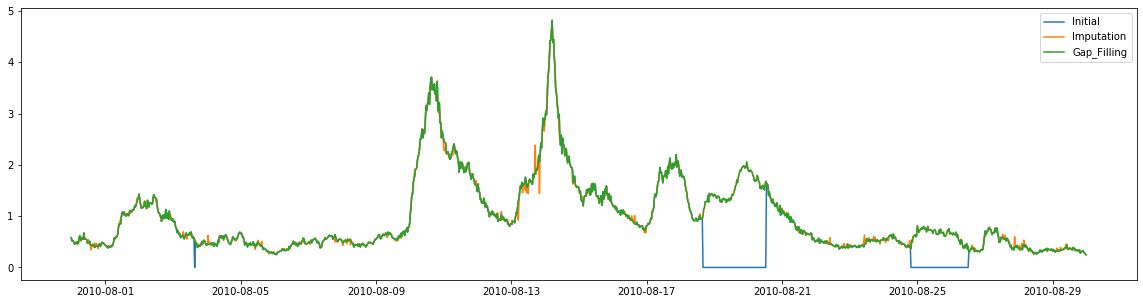

In [571]:
plt.figure(figsize=(20,5))
plt.plot(combine_dense_1.index[10080:11520],ini[:1440,7],label='Initial')
plt.plot(combine_dense_1.index[10080:11520],imput[:1440,7], label='Imputation')
plt.plot(combine_dense_1.index[10080:11520],ini_copy[:1440,7], label='Gap_Filling')
plt.legend()
plt.savefig("Typical_Gap_Filling_3_Hs.png",dpi=500, box_inches='tight')

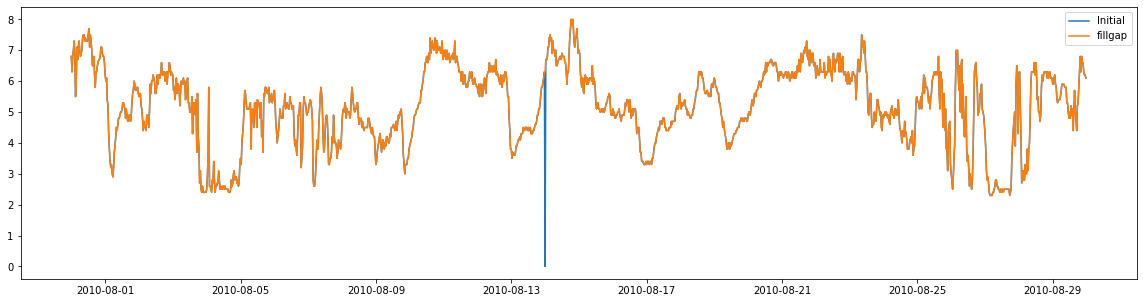

In [563]:
plt.figure(figsize=(20,5))
plt.plot(combine_dense_1.index[10080:11520],ini[:1440,3],label='Initial')
# plt.plot(combine_dense_1.index[10080:11520],imput[:1440,3], label='Imputation')
plt.plot(combine_dense_1.index[10080:11520],ini_copy[:1440,3], label='fillgap')
plt.legend()

In [397]:
combine_dense_1.keys()

Index(['1Wave Height (m)', '1Max Wave Height (m)', '1Tpeak (s)', '1Tz (s)',
       '1Peak Direction (degrees)', '1Spread (degrees)', '1Sea Temp (C)',
       '2Wave Height (m)', '2Max Wave Height (m)', '2Tpeak (s)', '2Tz (s)',
       '2Peak Direction (degrees)', '2Spread (degrees)', '2Sea Temp (C)',
       '3Wave Height (m)', '3Max Wave Height (m)', '3Tpeak (s)', '3Tz (s)',
       '3Peak Direction (degrees)', '3Spread (degrees)', '3Sea Temp (C)'],
      dtype='object')

# Imputation transfer 0 direction (invalid) to normal degree

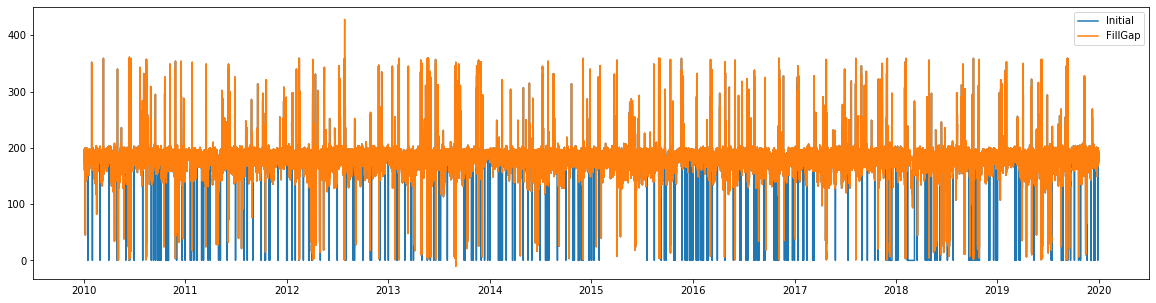

In [559]:
plt.figure(figsize=(20,5))
plt.plot(combine_dense_1.index,ini[:,4],label='Initial')
# plt.plot(combine_dense_1.index,imput[:,4], label='Imputation')
plt.plot(combine_dense_1.index,ini_copy[:,4], label='FillGap')
plt.legend()
# plt.ylim(-1,1)

Transfer Dirp to sin & cos and reverse back

In [316]:
i = 18 # 11, 18 
# reverse_theta
print('%s, RMSE: %.4f, MAPE: %.4f, r2: %.4f'%(combine_dense_1.keys()[i],np.round(compute_rmse(ini[:,i][ini[:,i]!=0], Dirp1_reverse[ini[:,i]!=0]),4),
         np.round(compute_mape(ini[:,i][ini[:,i]!=0], Dirp1_reverse[ini[:,i]!=0]),4), np.round(compute_r2(ini[:,i][ini[:,i]!=0], Dirp1_reverse[ini[:,i]!=0]),4)))
# cos(reverse_theta)
print('cos_%s, RMSE: %.4f, MAPE: %.4f, r2: %.4f'%(combine_dense_1.keys()[i],np.round(compute_rmse(np.cos(ini[:,i][ini[:,i]!=0]), np.cos(Dirp1_reverse[ini[:,i]!=0])),4),
         np.round(compute_mape(np.cos(ini[:,i][ini[:,i]!=0]), np.cos(Dirp1_reverse[ini[:,i]!=0])),4), np.round(compute_r2(np.cos(ini[:,i][ini[:,i]!=0]), np.cos(Dirp1_reverse[ini[:,i]!=0])),4)))

3Peak Direction (degrees), RMSE: 105.0186, MAPE: 0.4144, r2: -27.1068
cos_3Peak Direction (degrees), RMSE: 0.9706, MAPE: 0.6479, r2: -0.8917


In [307]:
i = 18 # 4, 11, 18 cos(reverse_theta)
print('%s, RMSE: %.4f, MAPE: %.4f, r2: %.4f'%(combine_dense_1.keys()[i],np.round(compute_rmse(np.cos(ini[:,i][ini[:,i]!=0]), np.cos(Dirp1_reverse[ini[:,i]!=0])),4),
         np.round(compute_mape(np.cos(ini[:,i][ini[:,i]!=0]), np.cos(Dirp1_reverse[ini[:,i]!=0])),4), np.round(compute_r2(np.cos(ini[:,i][ini[:,i]!=0]), np.cos(Dirp1_reverse[ini[:,i]!=0])),4)))

3Peak Direction (degrees), RMSE: 0.9706, MAPE: 0.6479, r2: -0.8917


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


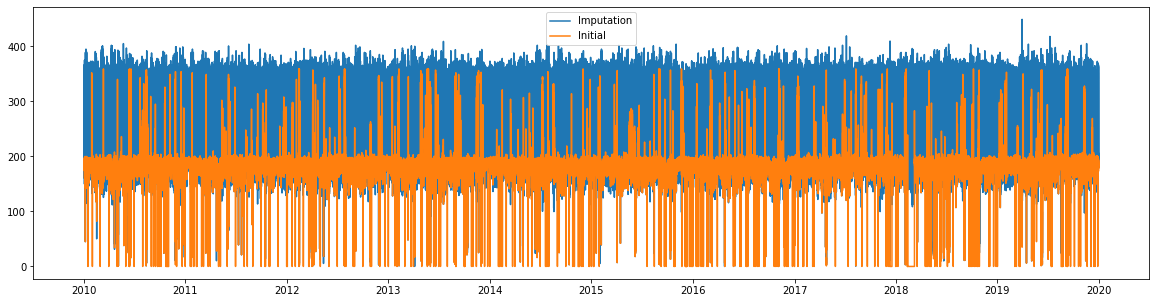

In [439]:
# Dirp transformation does not work.
plt.figure(figsize=(20,5))
plt.plot(combine_dense_1.index,Dirp1_reverse, label='Imputation')
# plt.plot(combine_dense_1.index,ini_copy[:,4], label='FillGap')
plt.plot(combine_dense_1.index,ini[:,4],label='Initial')
plt.legend()
# plt.ylim(-1,1)

In [461]:
plt.figure(figsize=(20,5))
plt.plot(combine_dense_1.index,imput[:,23], label='Imputation')
# plt.plot(combine_dense_1.index,ini_copy[:,4], label='FillGap')
plt.plot(combine_dense_1.index,ini[:,23],label='Initial')
plt.legend()
# plt.ylim(-1,1)

In [173]:
find_pos('2018-02-01 00:00:00', combine_dense_1)

Int64Index([141696], dtype='int64')

In [172]:
find_pos('2018-04-01 00:00:00', combine_dense_1)

Int64Index([144528], dtype='int64')

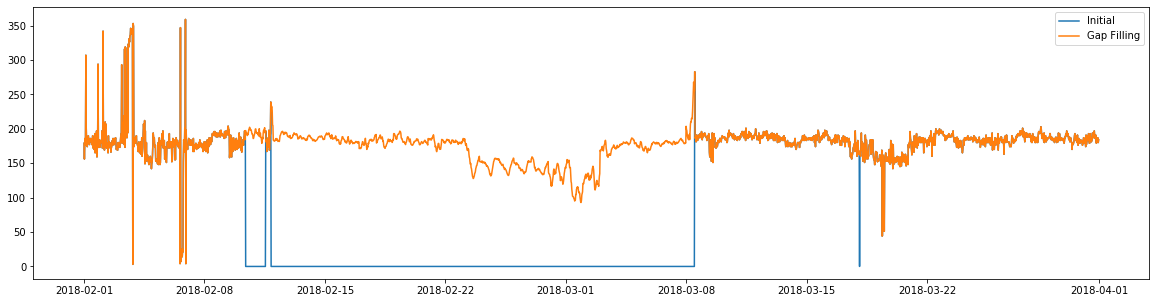

In [598]:
# Fill Dirp gap, but there are 2 times exceeded the threshold.
plt.figure(figsize=(20,5))
plt.plot(combine_dense_1.index[141696:144528],combine_dense_1.iloc[141696:144528,4],label='Initial')
# plt.plot(combine_dense_1.index[141696:144528],imput[141696:144528,4], label='Imputation')
plt.plot(combine_dense_1.index[141696:144528],ini_copy[141696:144528,4],label='Gap Filling')

plt.legend()
# plt.ylim(-1,1)
plt.savefig("Typical_Gap_Filling_4_Dirp.png",dpi=500, box_inches='tight')

In [599]:
combine_dense_1

,Wave Height (m),Max Wave Height (m),Tpeak (s),Tz (s),Peak Direction (degrees),Spread (degrees),Sea Temp (C),Wave Height (m),Max Wave Height (m),Tpeak (s),...,Peak Direction (degrees),Spread (degrees),Sea Temp (C),Wave Height (m),Max Wave Height (m),Tpeak (s),Tz (s),Peak Direction (degrees),Spread (degrees),Sea Temp (C)
Time (GMT),,,,,,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,0.41,0.53,10.5,6.8,188.0,16.0,8.1,0.58,0.77,13.3,...,201.0,15.0,9.0,0.52,0.94,10.5,4.0,283.0,27.0,9.0
2010-01-02 00:30:00,0.37,0.59,11.1,6.3,187.0,10.0,8.2,0.52,0.79,11.1,...,208.0,19.0,9.1,0.54,0.79,4.8,4.1,316.0,42.0,9.1
2010-01-02 01:00:00,0.38,0.55,12.5,6.8,184.0,9.0,8.1,0.52,0.84,11.1,...,215.0,19.0,9.0,0.53,0.74,10.0,4.2,280.0,31.0,9.0
2010-01-02 01:30:00,0.38,0.59,11.8,7.0,184.0,12.0,8.2,0.51,0.81,12.5,...,203.0,14.0,9.0,0.56,0.80,4.4,4.1,326.0,49.0,9.0
2010-01-02 02:00:00,0.39,0.51,11.1,7.3,190.0,11.0,8.3,0.48,0.63,10.5,...,212.0,15.0,9.0,0.57,0.89,10.0,4.2,290.0,22.0,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 21:30:00,0.72,1.23,5.0,4.3,184.0,19.0,10.5,0.89,1.08,10.0,...,205.0,14.0,10.9,1.27,1.96,11.8,6.6,290.0,28.0,10.6
2019-12-30 22:00:00,0.71,1.03,5.3,4.3,186.0,23.0,10.5,0.85,1.40,11.1,...,211.0,17.0,10.9,1.30,1.98,11.1,6.8,274.0,34.0,10.6
2019-12-30 22:30:00,0.71,0.92,5.6,4.2,181.0,19.0,10.5,0.81,1.19,11.8,...,210.0,13.0,10.9,1.16,1.76,11.8,6.5,277.0,40.0,10.6


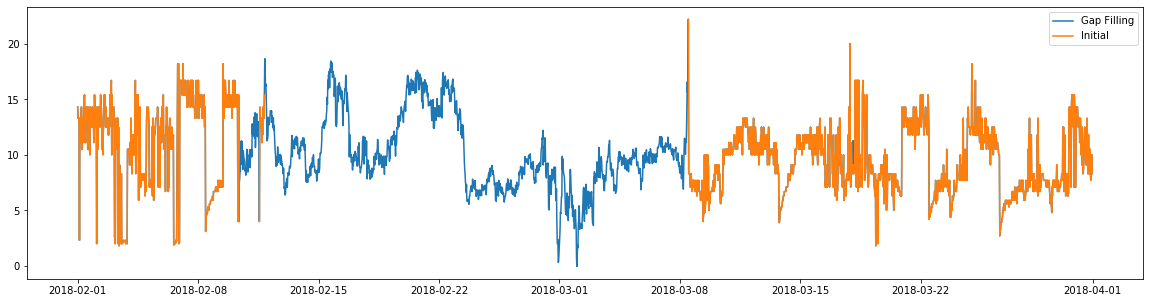

In [602]:
# Fill Dirp gap, but there are 2 times exceeded the threshold.
plt.figure(figsize=(20,5))

# plt.plot(combine_dense_1.index[141696:144528],imput[141696:144528,2], label='Imputation')
plt.plot(combine_dense_1.index[141696:144528],ini_copy[141696:144528,2],label='Gap Filling')
plt.plot(combine_dense_1.index[141696:144528],combine_dense.iloc[141696:144528,2],label='Initial')
plt.legend()
# plt.ylim(-1,1)
plt.savefig("Typical_Gap_Filling_5_Tp.png",dpi=500, box_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  


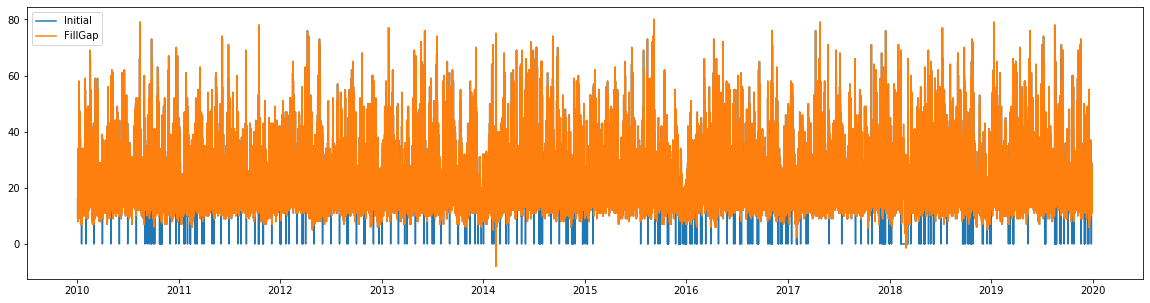

In [561]:
plt.figure(figsize=(20,5))
plt.plot(combine_dense_1.index,ini[:,5],label='Initial')
# plt.plot(combine_dense_1.index,imput[:,5], label='Imputation')
plt.plot(combine_dense_1.index,ini_copy[:,5], label='FillGap')
plt.legend()
plt.savefig("Typical_Gap_Filling_2_Dirsp.png",dpi=500, box_inches='tight')

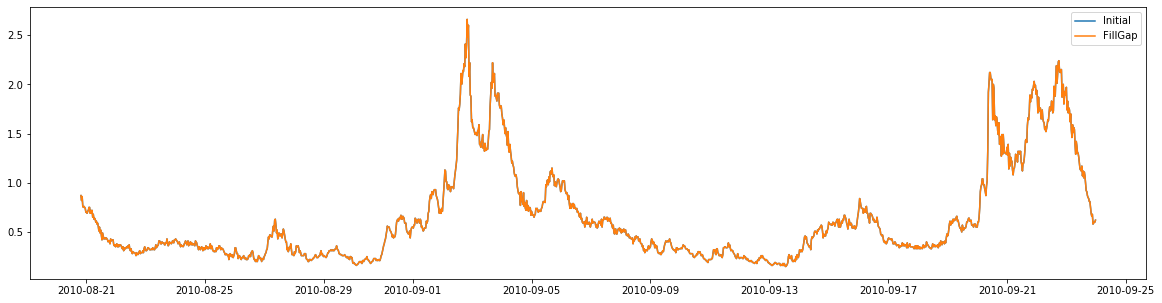

In [562]:
plt.figure(figsize=(20,5))
plt.plot(combine_dense_1.index[11080:12720],ini[1000:2640,0],label='Initial')
# plt.plot(combine_dense_1.index[11080:12720],imput[1000:2640,0], label='Imputation')
plt.plot(combine_dense_1.index[11080:12720],ini_copy[1000:2640,0], label='FillGap')
# plt.ylim(7,9)
plt.legend()

# Compare the imputation and original timeseries with no zero

In [402]:
# Compute rmse/mape of non-zero dataset vs imputation
for i in range(len(combine_dense_1.keys())):
    if np.ceil((i+1)/7)>np.ceil(i/7):
        print('\n')
#     print(combine_dense_1.keys()[i], ', RMSE:',np.round(compute_rmse(ini[:,i][ini[:,i]!=0], imput[:,i][ini[:,i]!=0]),4),
#           ', MAPE:',np.round(compute_mape(ini[:,i][ini[:,i]!=0], imput[:,i][ini[:,i]!=0]),4))
    print('%s, RMSE: %.4f, MAPE: %.4f, r2: %.4f'%(combine_dense_1.keys()[i],np.round(compute_rmse(ini[:,i][ini[:,i]!=0], imput[:,i][ini[:,i]!=0]),4),
         np.round(compute_mape(ini[:,i][ini[:,i]!=0], imput[:,i][ini[:,i]!=0]),4), np.round(compute_r2(ini[:,i][ini[:,i]!=0], imput[:,i][ini[:,i]!=0]),4)))



1Wave Height (m), RMSE: 0.0352, MAPE: 0.0177, r2: 0.9954
1Max Wave Height (m), RMSE: 0.1839, MAPE: 0.0396, r2: 0.9621
1Tpeak (s), RMSE: 0.9218, MAPE: 0.0452, r2: 0.9394
1Tz (s), RMSE: 0.1545, MAPE: 0.0119, r2: 0.9796
1Peak Direction (degrees), RMSE: 7.3329, MAPE: 0.0233, r2: 0.9113
1Spread (degrees), RMSE: 2.2004, MAPE: 0.0332, r2: 0.9269
1Sea Temp (C), RMSE: 0.0597, MAPE: 0.0016, r2: 0.9996


2Wave Height (m), RMSE: 0.0440, MAPE: 0.0167, r2: 0.9952
2Max Wave Height (m), RMSE: 0.1922, MAPE: 0.0324, r2: 0.9659
2Tpeak (s), RMSE: 0.9478, MAPE: 0.0460, r2: 0.9375
2Tz (s), RMSE: 0.1480, MAPE: 0.0109, r2: 0.9813
2Peak Direction (degrees), RMSE: 8.4457, MAPE: 0.0205, r2: 0.9354
2Spread (degrees), RMSE: 2.1541, MAPE: 0.0339, r2: 0.9064
2Sea Temp (C), RMSE: 0.0675, MAPE: 0.0017, r2: 0.9994


3Wave Height (m), RMSE: 0.0841, MAPE: 0.0247, r2: 0.9920
3Max Wave Height (m), RMSE: 0.3861, MAPE: 0.0336, r2: 0.9460
3Tpeak (s), RMSE: 0.6689, MAPE: 0.0244, r2: 0.9521
3Tz (s), RMSE: 0.1479, MAPE: 0.0088

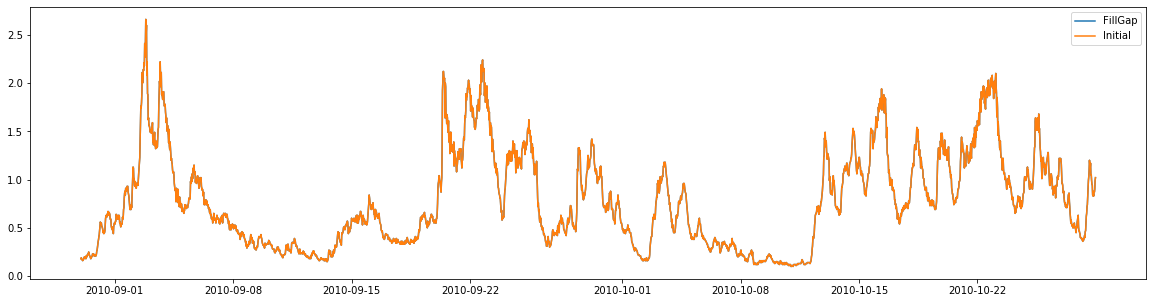

In [544]:
plt.figure(figsize=(20,5))
# plt.plot(combine_dense_1.index[11520:14400],imput[1440:4320,0], label='Imputation')
plt.plot(combine_dense_1.index[11520:14400],ini_copy[1440:4320,0], label='FillGap')
plt.plot(combine_dense_1.index[11520:14400],ini[1440:4320,0],label='Initial')
plt.legend()

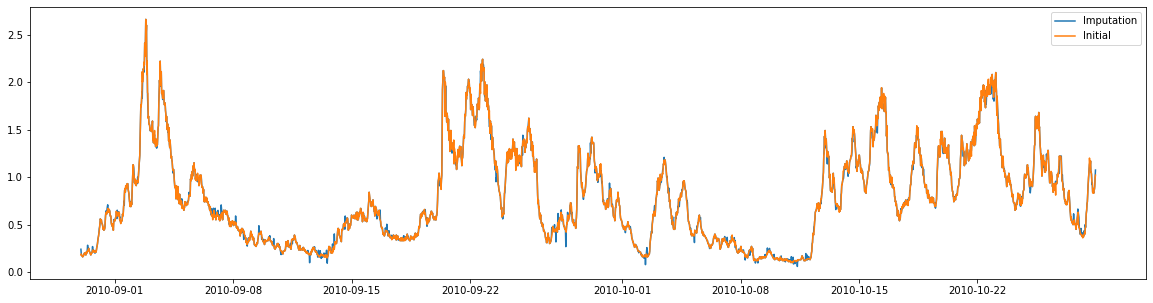

In [419]:
plt.figure(figsize=(20,5))
plt.plot(combine_dense_1.index[11520:14400],imput[1440:4320,0], label='Imputation')
plt.plot(combine_dense_1.index[11520:14400],ini[1440:4320,0],label='Initial')
plt.legend()

# A long gap imputation

In [556]:
imputation_series = pd.DataFrame(ini_copy, columns=combine_dense_1.keys(), index=combine_dense.index)

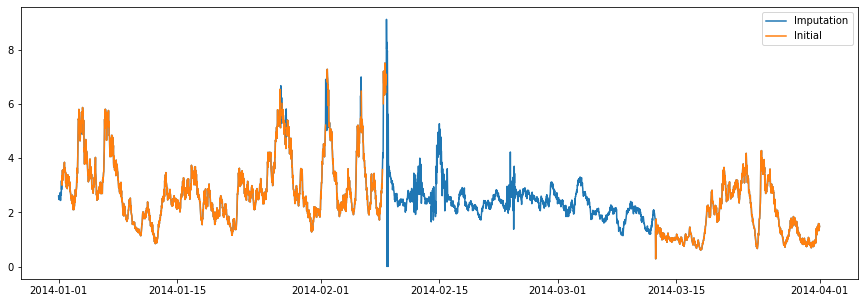

In [558]:
plt.figure(figsize=(15,5))
# plt.plot(aa1[aa1.index.year==2015]['Tpeak (s)'],label='Buoy')
# plt.plot(aa1[aa1.index.year==2015]['Tp_pred'],label='Pred')
plt.plot(imputation_series[(imputation_series.index.year==2014)& ((imputation_series.index.month==3)|(imputation_series.index.month==2)|(imputation_series.index.month==1))]['Wave Height (m)'].iloc[:,2],label='Imputation')
plt.plot(combine_dense[(combine_dense.index.year==2014)& ((combine_dense.index.month==3)|(combine_dense.index.month==2)|(combine_dense.index.month==1))]['Wave Height (m)'].iloc[:,2],label='Initial')
# plt.plot(aa1[aa1.index.year==2019]['Peak Direction (degrees)'],label='Buoy')
# plt.plot(aa1[aa1.index.year==2019]['Dir_pred'],label='Pred')
# plt.ylim(250,300)
# plt.plot(aa[(aa.index.year==2014) & (aa.index.month==3)]['Tz (s)'],label='Buoy')
# plt.plot(aa[(aa.index.year==2014) & (aa.index.month==3)]['Tm02_pred'], label='Pred')
plt.legend()
plt.savefig("Typical_Gap_Filling_1.png",dpi=500, box_inches='tight')

In [420]:
np.array(imputation_series)[np.array(imputation_series)==0]
# imputation_series

array([], dtype=float64)

In [202]:
imputation_series.iloc[:7200,0].mean()

0.6268947686501838

In [196]:
save('Imputed_Measurement',imputation_series)

In [197]:
imputation_series

,Wave Height (m),Max Wave Height (m),Tpeak (s),Tz (s),Peak Direction (degrees),Spread (degrees),Sea Temp (C),Wave Height (m),Max Wave Height (m),Tpeak (s),...,Peak Direction (degrees),Spread (degrees),Sea Temp (C),Wave Height (m),Max Wave Height (m),Tpeak (s),Tz (s),Peak Direction (degrees),Spread (degrees),Sea Temp (C)
Time (GMT),,,,,,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,0.41,0.53,10.5,6.8,188.0,16.0,8.1,0.58,0.77,13.3,...,201.0,15.0,9.0,0.52,0.94,10.5,4.0,283.0,27.0,9.0
2010-01-02 00:30:00,0.37,0.59,11.1,6.3,187.0,10.0,8.2,0.52,0.79,11.1,...,208.0,19.0,9.1,0.54,0.79,4.8,4.1,316.0,42.0,9.1
2010-01-02 01:00:00,0.38,0.55,12.5,6.8,184.0,9.0,8.1,0.52,0.84,11.1,...,215.0,19.0,9.0,0.53,0.74,10.0,4.2,280.0,31.0,9.0
2010-01-02 01:30:00,0.38,0.59,11.8,7.0,184.0,12.0,8.2,0.51,0.81,12.5,...,203.0,14.0,9.0,0.56,0.80,4.4,4.1,326.0,49.0,9.0
2010-01-02 02:00:00,0.39,0.51,11.1,7.3,190.0,11.0,8.3,0.48,0.63,10.5,...,212.0,15.0,9.0,0.57,0.89,10.0,4.2,290.0,22.0,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 21:30:00,0.72,1.23,5.0,4.3,184.0,19.0,10.5,0.89,1.08,10.0,...,205.0,14.0,10.9,1.27,1.96,11.8,6.6,290.0,28.0,10.6
2019-12-30 22:00:00,0.71,1.03,5.3,4.3,186.0,23.0,10.5,0.85,1.40,11.1,...,211.0,17.0,10.9,1.30,1.98,11.1,6.8,274.0,34.0,10.6
2019-12-30 22:30:00,0.71,0.92,5.6,4.2,181.0,19.0,10.5,0.81,1.19,11.8,...,210.0,13.0,10.9,1.16,1.76,11.8,6.5,277.0,40.0,10.6


##  Semidiurnal type validation   https://oceanservice.noaa.gov/education/tutorial_tides/tides07_cycles.html
Tidal Cycles around UK coastal area belongs to Semidiurnal type. Therefore, the wave and current parameter can be filtered into half day frequency

In [403]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition_buoy1_Hs = seasonal_decompose(imputation_series.iloc[:,0], freq=24, two_sided=True)
decomposition_buoy2_Hs = seasonal_decompose(imputation_series.iloc[:,7], freq=24, two_sided=True)
decomposition_buoy3_Hs = seasonal_decompose(imputation_series.iloc[:,14], freq=24, two_sided=True)
# decomposition_1.plot()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


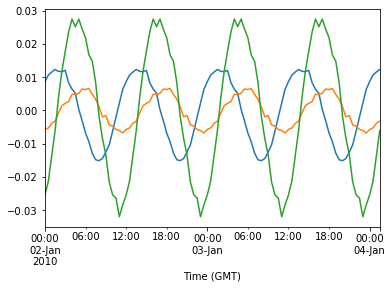

In [404]:
decomposition_buoy1_Hs.seasonal[:100].plot()
decomposition_buoy2_Hs.seasonal[:100].plot()
decomposition_buoy3_Hs.seasonal[:100].plot()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


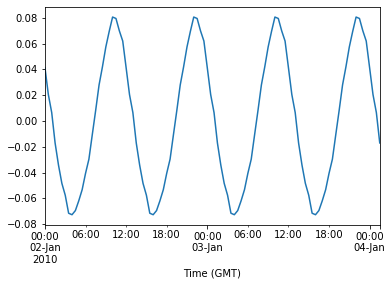

In [405]:

from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition_1 = seasonal_decompose(imputation_series.iloc[:,10], freq=24, two_sided=True)
decomposition_1.seasonal[:100].plot()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


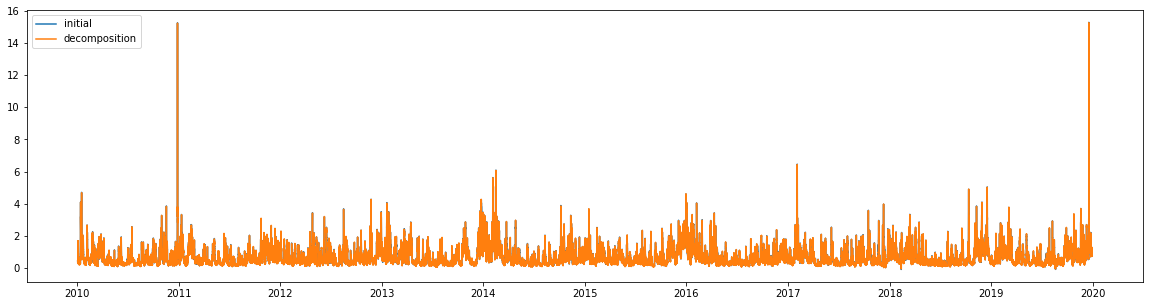

In [317]:
plt.figure(figsize=(20,5))
plt.plot(imputation_series.iloc[:,0],label='initial')
plt.plot(imputation_series.iloc[:,0]-decomposition_1.seasonal,label='decomposition')
# plt.plot(imputation_series.resample('0.5D').mean().iloc[:,0],label='resample')
plt.legend()

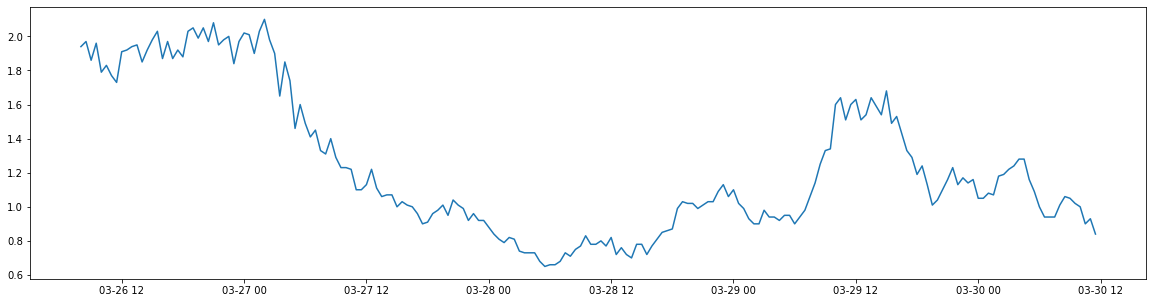

In [322]:
plt.figure(figsize=(20,5))
plt.plot(imputation_series.iloc[4000:4200,0],label='initial')

In [281]:
(imputation_series.iloc[:,0] - imputation_series.iloc[:,0]-decomposition_1.seasonal).describe()

count    1.752000e+05
mean     5.780035e-19
std      1.794995e-02
min     -2.548387e-02
25%     -1.770402e-02
50%     -1.789918e-03
75%      1.739238e-02
max      2.732890e-02
dtype: float64

In [436]:
# imputation_series

In [13]:
imputation_series = load('Imputed_Measurement')
# imputation_series

# ####################Fill Gap End#######################